## O seguinte *script* é utilizado para criar um *dataset* completo e gerar os gráficos de análise de qualidade de voz **(MOS)** e taxa de erros de *bit* **(BER)**

###  Concatena todos os *datasets* dentro da pasta

In [1]:
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
%matplotlib inline
import os
import platform
import pandas as pd
import platform
import seaborn as sns
import re

# Identifica sistema operacional

system_os = platform.system()

if system_os == 'Linux':
    path_delim = '/'
if system_os == 'Windows':
    path_delim = '\\'

path = input(r'Diretório que contem os dados:')
file_name = path.split(path_delim)[-1]
files = os.listdir(path)

df_list = []
count = 0

for txt in files:
    if txt.endswith('.txt'):

        # Lê data set e adiciona cabecalho

        df = pd.read_csv(path + path_delim + txt, index_col=None, delimiter=',', 
                  names=["SNR", "MOS", "BER"])
    
        # Adiciona coluna com tipo de codificação de 
        # canal em cada data set

        idx_len = len(df.index)
        code = re.search("\(.*?\)", txt)
        if code != None:
            code = code.group(0)
            code = ['RS ' + code.replace('-', ', ')] * idx_len
        else:
            code = ['No Code'] * idx_len
        df['FEC'] = code
    
        # Concatena todos data sets 

        df_list.append(df)
df_list = pd.concat(df_list)
df_list

Diretório que contem os dados:/home/leonardo/Qualidade-de-Voz/Resultados/BPSK


,SNR,MOS,BER,FEC
0,0,0.87288,0.078608,"RS (255, 185)"
1,1,0.94137,0.056203,"RS (255, 185)"
2,2,0.89413,0.037404,"RS (255, 185)"
3,3,1.02080,0.021070,"RS (255, 185)"
4,4,2.48930,0.000199,"RS (255, 185)"
...,...,...,...,...
26,26,4.50000,0.000000,"RS (400, 240)"
27,27,4.50000,0.000000,"RS (400, 240)"
28,28,4.50000,0.000000,"RS (400, 240)"
29,29,4.50000,0.000000,"RS (400, 240)"


### Salva *dataset* em formato CSV

In [ ]:
try:
    df_list.to_csv(path + path_delim + file_name + '_dataset.csv')
except Exception as ex:
    print(ex)

###  Exibe *dataset* completo

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_list)

###  Cria e exibe gráfico do índice de qualidade (MOS)
> Os eixos *x* e *y* devem ser configurados para uma melhor visualização dos dados

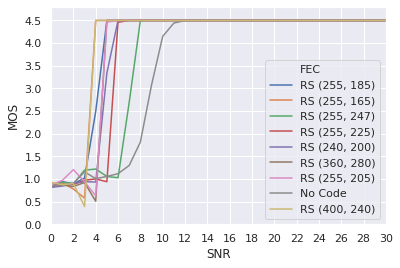

In [3]:
sns.set(style="darkgrid")
ax = sns.lineplot(x="SNR", y="MOS", hue="FEC", data=df_list)

# Define os limites dos eixos x e y

plt.ylim(0, 4.8)
plt.xlim(0, 30)

# Configura ticks dos eixos x e y

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

###  Salva gráfico em formato SVG

In [4]:
fig = ax.get_figure()
try:
    fig.savefig(path + path_delim + file_name + '_mos_lineplot.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)

###  Cria e exibe gráfico da análise de BER
> Os dados os eixos *x* e *y* devem ser configurados para uma melhor visualização dos dados

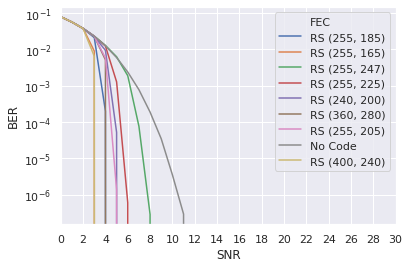

In [5]:
sns.set(style="darkgrid")
ax = sns.lineplot(x="SNR", y="BER", hue="FEC", data=df_list)

# Define o limite dos eixo x

plt.xlim(0, 30)

# Utiliza escala logarítmica para eixo y

ax.set_yscale('log')

# Configura ticks do eixo x

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

###  Salva gráfico em formato SVG

In [6]:
fig = ax.get_figure()
try:
    fig.savefig(path + path_delim + file_name + '_ber_lineplot.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)